In [2]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_54554_Z')

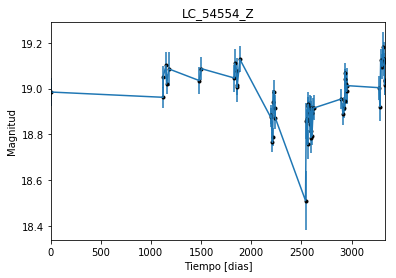

In [3]:
data = np.genfromtxt('LC_54554_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_54554_Z')

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [6]:
%%capture capt
sample = model.run_mcmc(20000)

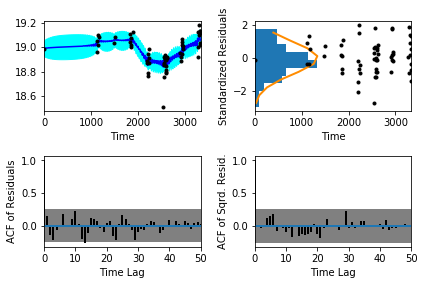

In [7]:
sample.assess_fit()

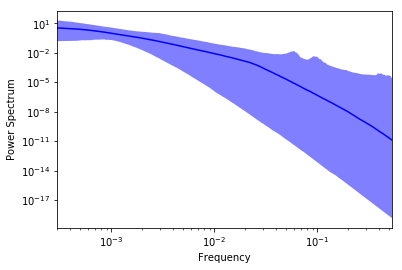

In [8]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [9]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_54554_z')

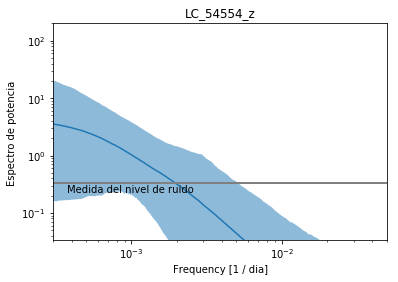

In [10]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_54554_z')

Text(0.5,1,'Prediccion , valor esperado LC_54554_z')

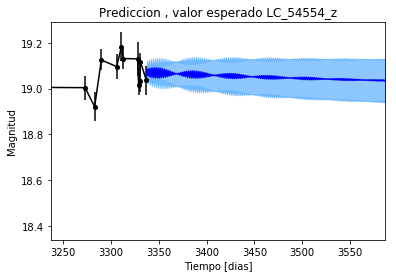

In [12]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_54554_z')

Text(0.5,1,'Prediccion, Caminos simulados LC_54554_Z')

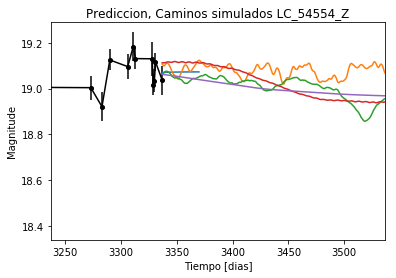

In [13]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_54554_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_54554_Z')

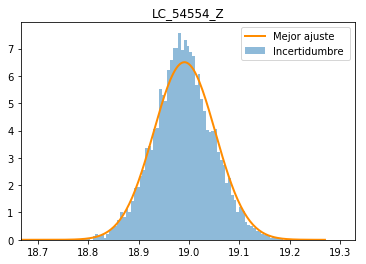

In [14]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_54554_Z')

Text(0.5,1,'Interpolacion, camino simulado 54554_Z')

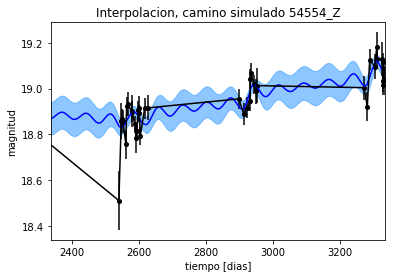

In [15]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado 54554_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_54554_Z')

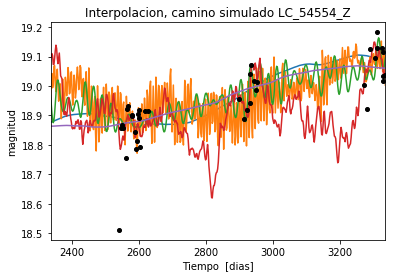

In [16]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_54554_Z')

In [17]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [18]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1317.23031353
Median: 0.00645809313711
Standard deviation: 0.1652769417
68% credibility interval: [ 0.00086116  0.10242178]
95% credibility interval: [  3.55777733e-04   6.45830950e-01]
99% credibility interval: [  3.16233893e-04   9.70343043e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 641.595710662
Median: 0.0024253848623
Standard deviation: 0.084097521627
68% credibility interval: [ 0.00050693  0.0292848 ]
95% credibility interval: [ 0.00032641  0.2821509 ]
99% credibility interval: [  3.05916843e-04   6.15682399e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 336.188025637
Median: 0.0508289274289
Standard dev

In [19]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 841.215854784
Median: 97.3571650348
Standard deviation: 1.66262214963
68% credibility interval: [ 95.66231485  98.53420959]
95% credibility interval: [  93.30379707  100.21009387]
99% credibility interval: [  91.35353253  101.05957838]


In [20]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 691.283035014
Median: 0.823333725713
Standard deviation: 2.11741255105
68% credibility interval: [ 0.09168276  3.90553762]
95% credibility interval: [ 0.01672259  6.97799143]
99% credibility interval: [ 0.01032083  9.8747222 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 580.542207873
Median: 0.472072157187
Standard deviation: 9.10545951498
68% credibility interval: [ 0.02091274  9.3927896 ]
95% credibility interval: [  8.96857391e-0

In [21]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1284.36058514
Median: 1.03162879736e-33
Standard deviation: 22171411046.3
68% credibility interval: [  6.88434364e-60   3.36416925e-08]
95% credibility interval: [  4.12759971e-181   8.46021644e+004]
99% credibility interval: [  5.27826746e-210   3.63368883e+007]


In [22]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2582.20340427
Median: 18.9951158836
Standard deviation: 0.0490671702987
68% credibility interval: [ 18.95366171  19.03932936]
95% credibility interval: [ 18.89915977  19.0958386 ]
99% credibility interval: [ 18.85471033  19.14277311]


In [23]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 386.566573558
Median: 0.0430936848585
Standard deviation: 0.250112590208
68% credibility interval: [ 0.          0.41341569]
95% credibility interval: [ 0.          0.89640716]
99% credibility interval: [ 0.          1.02844938]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 386.566573558
Median: 0.0430936848585
Standard deviation: 0.250112590208
68% credibility interval: [ 0.          0.41341569]
95% credibility interval: [ 0.          0.89640716]
99% credibility interval: [ 0.          1.02844938]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 685.802977572
Median: 0.0
Standard deviation: 0.000637845002699
68% cr

In [24]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 841.215854784
Median: 97.3571650348
Standard deviation: 1.66262214963
68% credibility interval: [ 95.66231485  98.53420959]
95% credibility interval: [  93.30379707  100.21009387]
99% credibility interval: [  91.35353253  101.05957838]


In [25]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1923.24328642
Median: 0.00901246439505
Standard deviation: 0.00993559575966
68% credibility interval: [ 0.00540961  0.01676584]
95% credibility interval: [ 0.0033751   0.03388769]
99% credibility interval: [ 0.00257897  0.06468877]


In [26]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1015.76532914
Median: 1.22442171364
Standard deviation: 0.21526053561
68% credibility interval: [ 1.0185796   1.44670952]
95% credibility interval: [ 0.84381022  1.68134322]
99% credibility interval: [ 0.742495    1.84494063]


In [27]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 859.601245072
Median: 0.000265374789462
Standard deviation: 0.157946489969
68% credibility interval: [  1.19229451e-06   2.51954044e-02]
95% credibility interval: [  2.94039965e-09   3.97033931e-01]
99% credibility interval: [  5.11369424e-12   1.09163943e+00]


In [28]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1317.23031353
Median: (-0.0405773959115-0.19673091797j)
Standard deviation: 1.88362282639
68% credibility interval: [-0.64353504-1.55386545j -0.00541080-0.02785055j]
95% credibility interval: [ -4.05787554e+00+0.j          -2.23541743e-03-0.00346698j]
99% credibility interval: [ -6.09684515e+00+0.j          -1.98695615e-03-0.01434995j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 641.595710662
Median: (-0.015239142531+4.29651842653j)
Standard deviation: 1.65795987054
68% credibility interval: [-0.18400180 +5.92268973e+00j -0.00318512 +2.72719498e-03j]
95% credibility interval: [-1.77280638+0.46120841j -0.00205091+0.0025427j ]
99% credibility interval: [ -3.86844660e+00+2.83912073j  -1.92213221e-03+0.j        ]
Poste